In [26]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(8,8))

In [196]:
# import images and resize into 250x250
import glob
img_rows, img_cols = 224, 224
import cv2
N = 150
data = np.empty((N, img_rows, img_cols), dtype=np.uint8)
img_names = []
for ix, filename in enumerate(glob.glob("../hackathon/*.jpg")):   #"/Users/Stav/Downloads/cars_markus/*.jpg")): #assuming gif
    try:
        img_names.append(filename)
        img = cv2.imread(filename,flags = 1)
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # opencv reads images in bgr lets convert back
    
        img = cv2.resize(img, (img_rows,img_cols))
        #print (img.shape)
        data[ix, ...] = img#.transpose(2, 0, 1)
    except:
        continue

In [198]:
data[0]

array([[ 94,  91,  65, ..., 242, 252, 253],
       [102,  78,  59, ..., 243, 252, 251],
       [ 96,  61,  68, ..., 250, 252, 250],
       ...,
       [129, 120, 119, ..., 110, 106, 106],
       [118, 111, 109, ..., 105, 106, 107],
       [110, 106, 102, ..., 103, 105, 104]], dtype=uint8)

In [158]:
data[0].shape

(224, 224)

# convert image data to gray

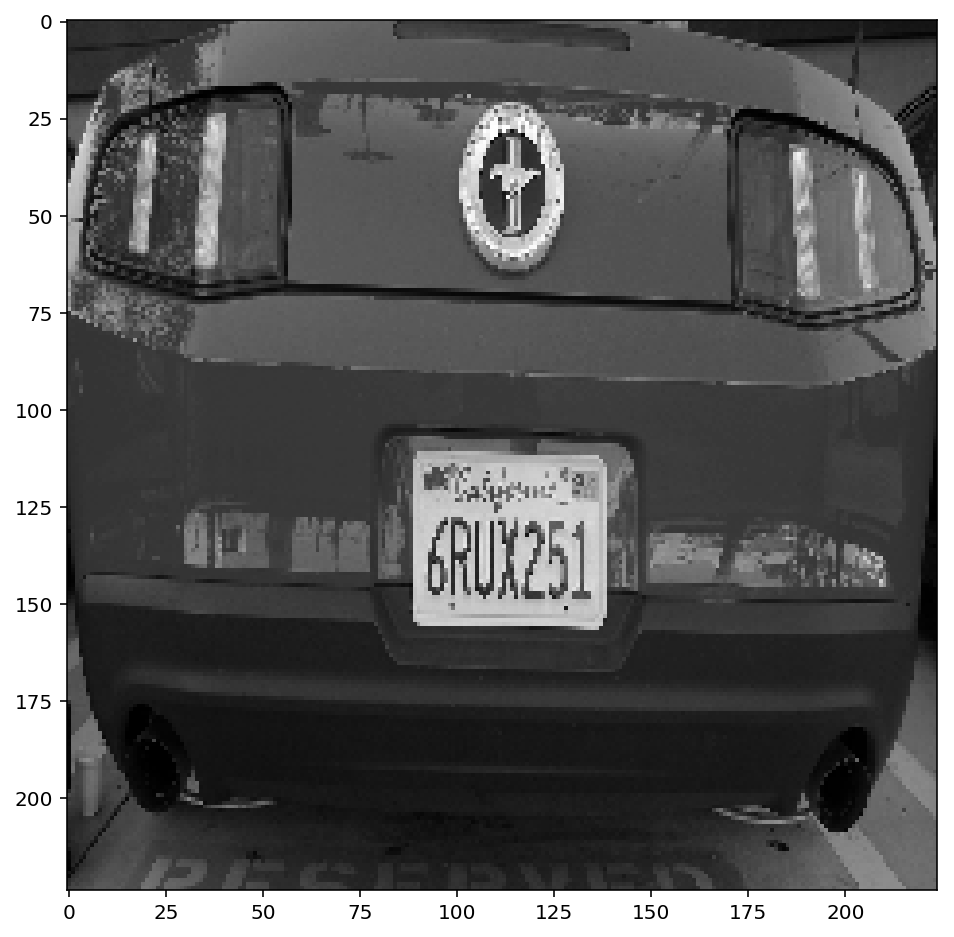

In [200]:
plt.figure(figsize = (8,8))

plt.imshow(data[1], cmap = "gray")

# Gaussian Blur

In [202]:
img = data[1]
noise_removal = cv2.bilateralFilter(img,9,75,75)

plt.figure(figsize = (8,8))

equal_histogram = cv2.equalizeHist(noise_removal)
plt.imshow(equal_histogram, cmap = "gray")

# Sobel: verticle edge detection

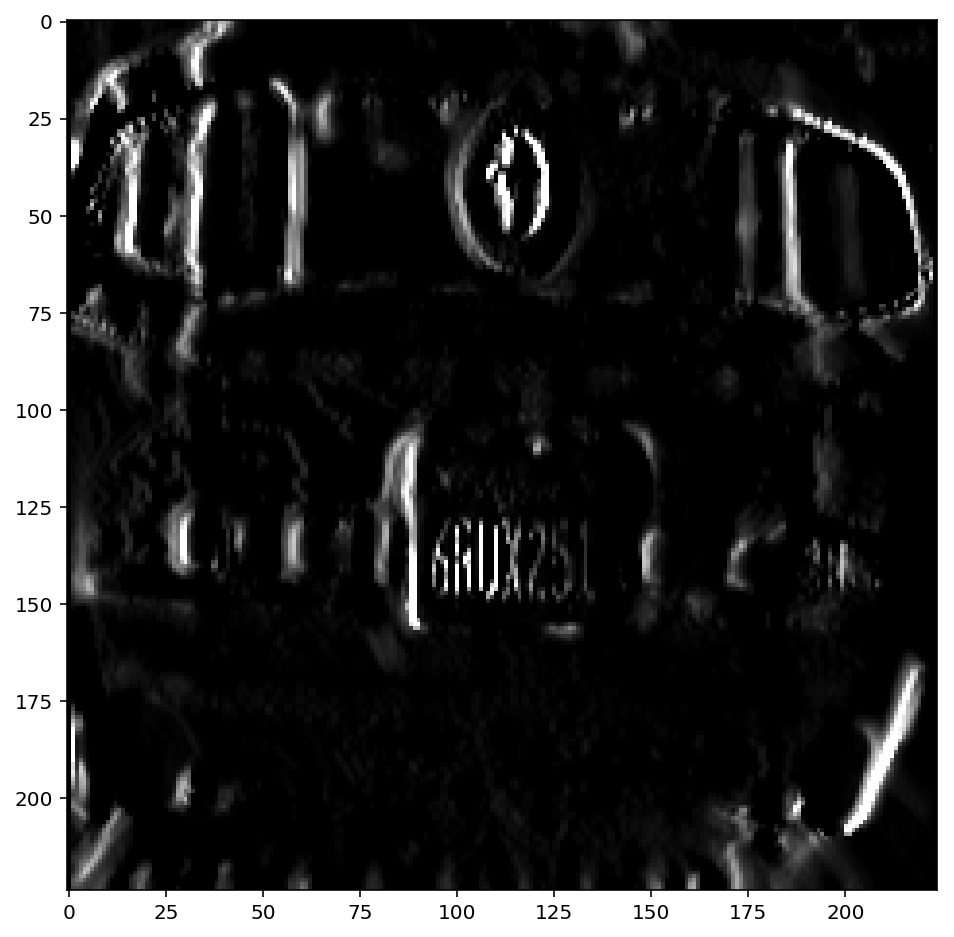

In [203]:
plt.figure(figsize = (8,8))

sobel_img = cv2.Sobel(equal_histogram, -1, 1, 0)


plt.imshow(sobel_img, cmap = "gray")

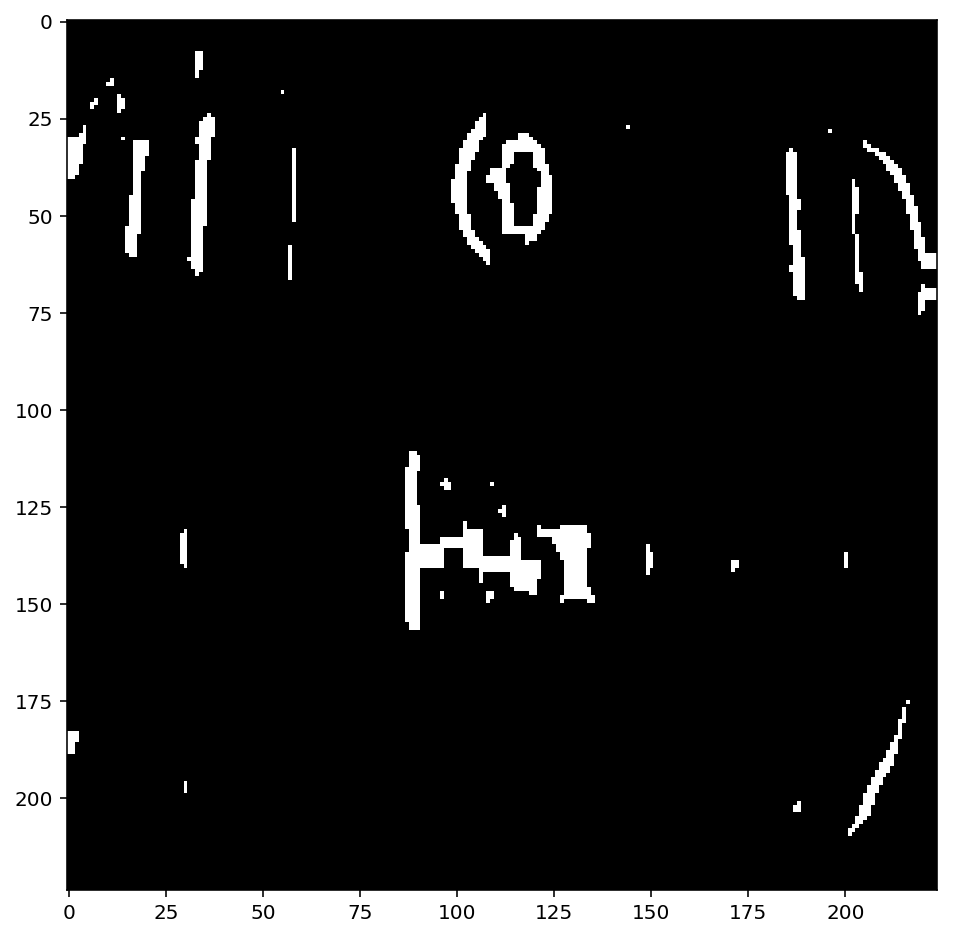

In [204]:
# image morphology

plt.figure(figsize = (8,8))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=15)
plt.imshow(morph_img, cmap = "gray")


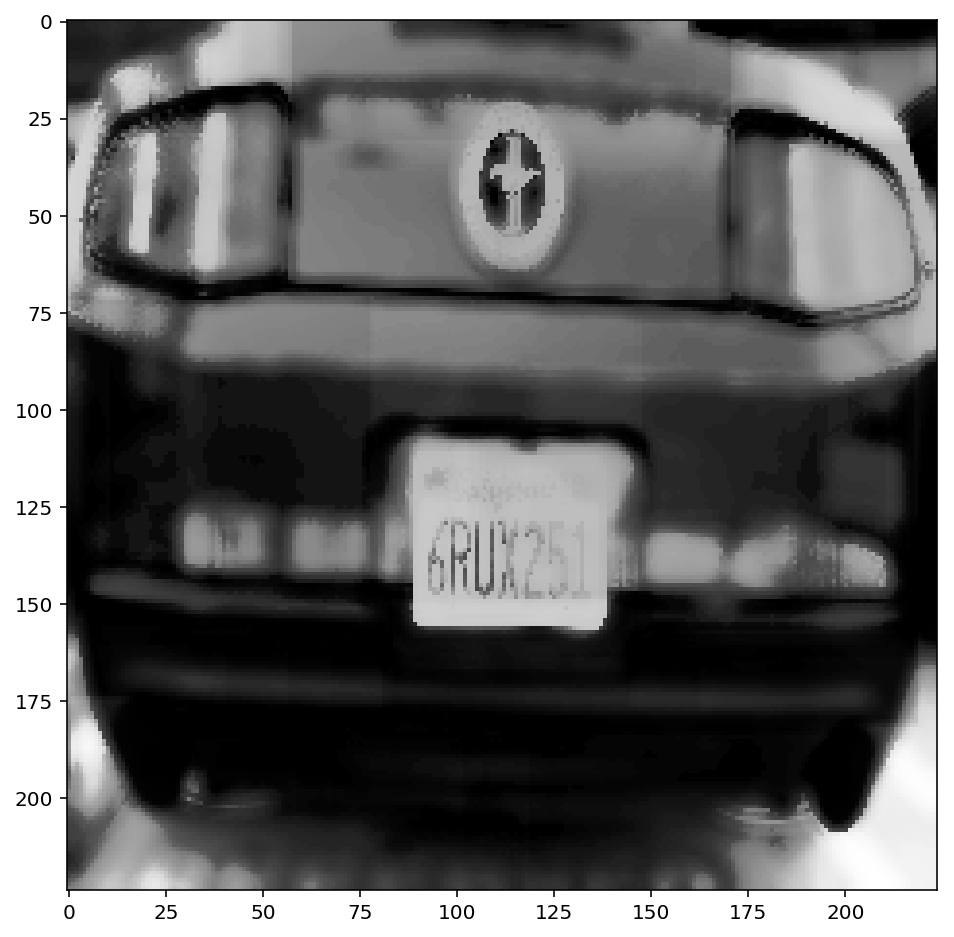

In [205]:
# image subtraction
plt.figure(figsize = (8,8))

sub_morp_image = cv2.subtract(equal_histogram,morph_image)
plt.imshow(sub_morp_image, cmap = "gray")


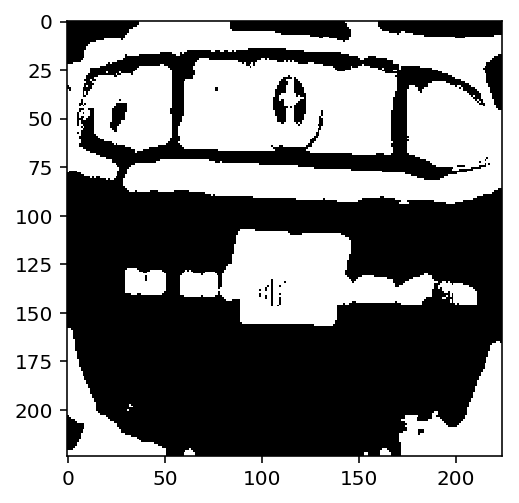

In [206]:
ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh_image, cmap="gray")

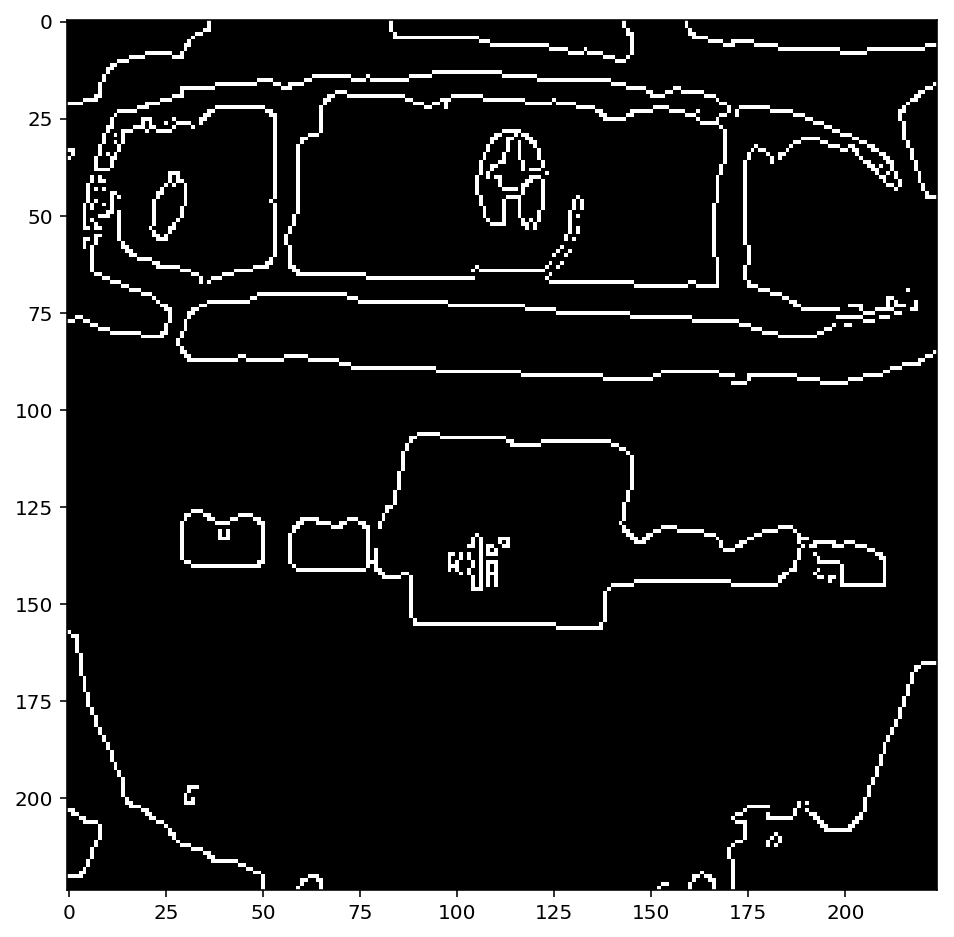

In [207]:
canny_image = cv2.Canny(thresh_image,250,255)
plt.figure(figsize = (8,8))

plt.imshow(canny_image, cmap="gray")


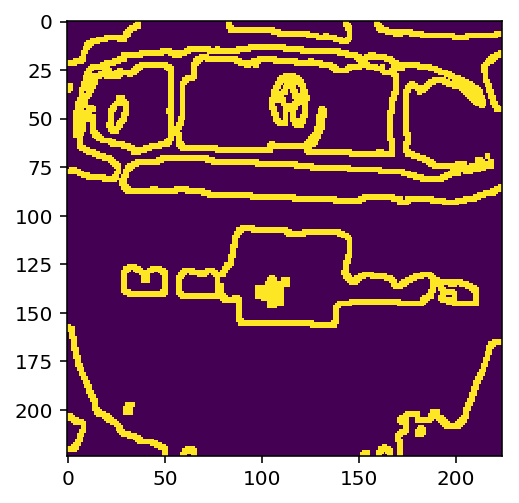

In [208]:
kernel = np.ones((3,3), np.uint8)
# Creating the kernel for dilation
dilated_image = cv2.dilate(canny_image,kernel,iterations=1)

plt.imshow(dilated_image)

In [213]:
edit_morph = morph_img.copy()

contoured_img, contours, hierarchy = cv2.findContours(edit_morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 


In [214]:
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]


screenCnt = None
for c in contours:
 # approximate the contour
 peri = cv2.arcLength(c, True)
 approx = cv2.approxPolyDP(c, 0.06 * peri, True)  # Approximating with 6% error
 # if our approximated contour has four points, then
 # we can assume that we have found our screen
 if len(approx) == 6:  # Select the contour with 4 corners
  screenCnt = approx
  break
final = cv2.drawContours(data[0], [screenCnt], -1, (0, 255, 0), 3)
# Drawing the selected contour on the original image
# Creating a Named window to display image
plt.imshow(final, cmap="gray")

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2603: error: (-215) reader.ptr != __null in function cvDrawContours


In [211]:
plt.figure(figsize = (8,8))

# Masking the part other than the number plate
mask = np.zeros(img_gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(new_image)


error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2603: error: (-215) reader.ptr != __null in function cvDrawContours


In [212]:

# Histogram equal for enhancing the number plate for further processing
y,cr,cb = cv2.split(cv2.cvtColor(new_image,cv2.COLOR_RGB2YCrCb))
# Converting the image to YCrCb model and splitting the 3 channels
y = cv2.equalizeHist(y)
# Applying histogram equalisation
final_image = cv2.cvtColor(cv2.merge([y,cr,cb]),cv2.COLOR_YCrCb2RGB)
# Merging the 3 channels
# Creating a Named window to display image
plt.imshow(final_image)
# Display image

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:11144: error: (-215) scn == 3 || scn == 4 in function cvtColor


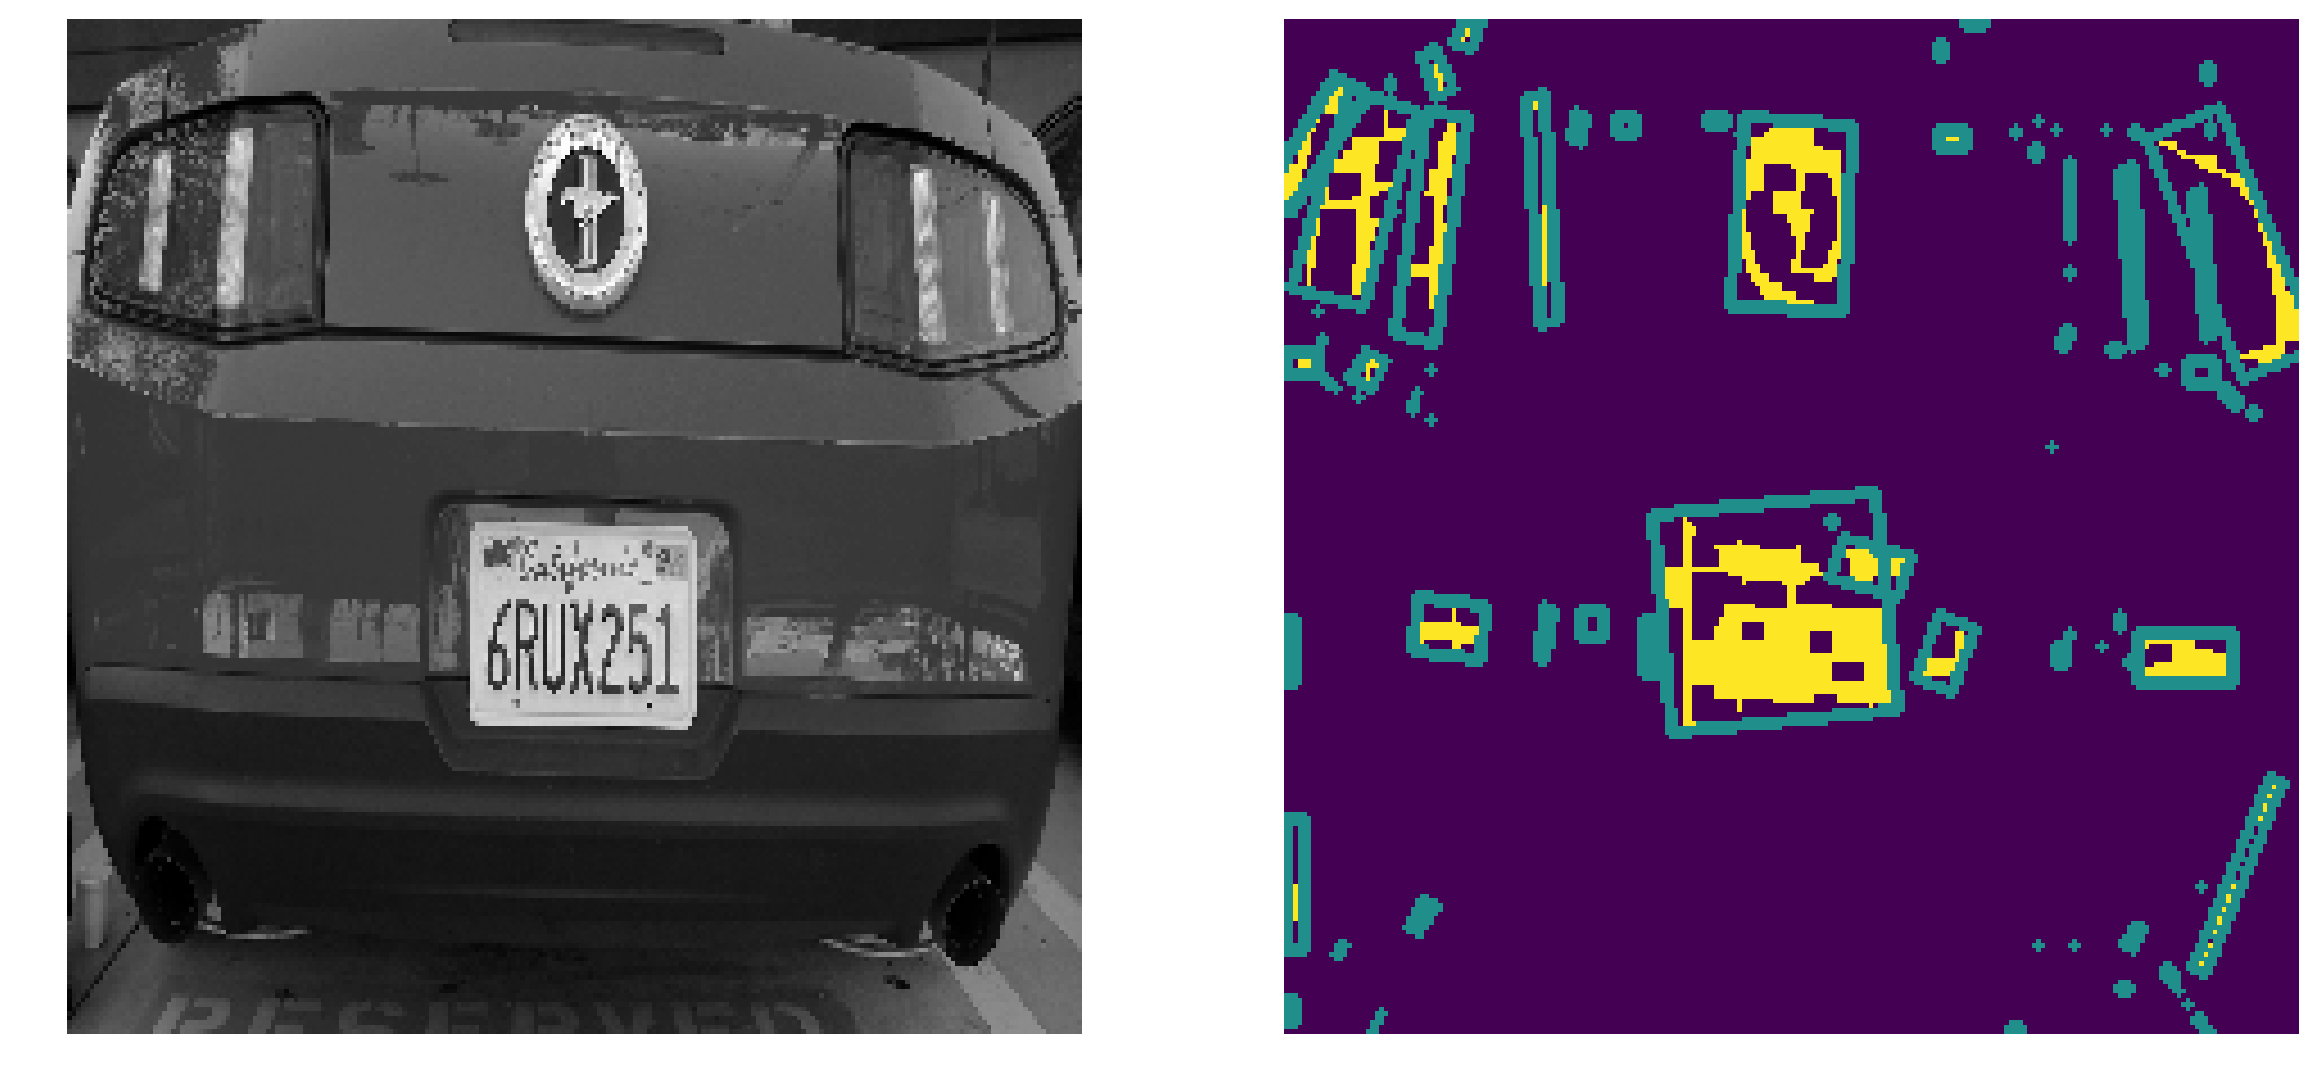

In [146]:
import matplotlib.pyplot as plt

# Spawn a new figure
plt.figure(figsize = (20,20))
# Show the first image on the left column
plt.subplot(1,2,1)
plt.imshow(data[0], cmap = "gray")
#plt.Rectangle(box_list[])
# Turn off axis numbering
plt.axis('off')

# Show the second image on the right column
plt.subplot(1,2,2)
#plt.Rectangle(box_list[1][0])
plt.imshow(edit_morph)#, cmap = "gray")
# Turn off the axis numbering
plt.axis('off')

# Show the figure
plt.show()

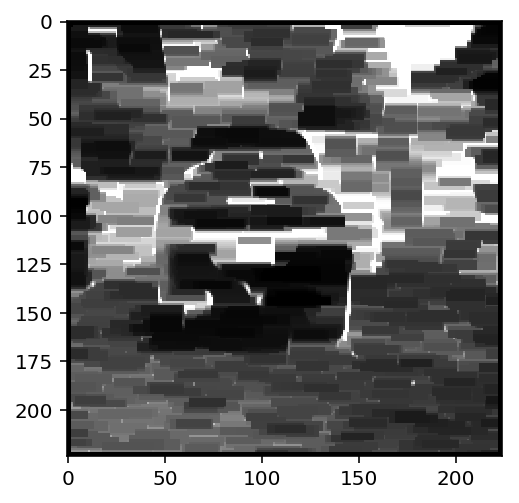

In [39]:
plt.imshow(img, cmap = "gray")

In [29]:
for c in contours[0]:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: 
        continue
    print (cv2.contourArea(c))
    x,y,w,h = cv2.boundingRect(c)

    cv2.rectangle(morph_img,(x,y),(x+w,y+h),(0,255,0),2)
#plt.imshow("Show",morph_img)


In [31]:
morph_img.shape

(224, 224)

In [32]:
plt.imshow(morph_img)

In [23]:
rect

((92.0, 0.0), (0.0, 0.0), 0.0)

In [10]:
im_list = []
for cnt in contours[0][0:10]:
    
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    im = cv2.drawContours(morph_img,[box],0,(0,0,255),2)
    im_list.append(im)

In [91]:
plt.imshow(morph_img, cmap = "gray")


In [33]:

rect_
list = [cv2.minAreaRect(cnt) for cnt in contours]

box_list = [cv2.boxPoints(rect) for rect in rect_list]

box_list = [np.int0(box) for box in box_list]

In [24]:
cv2.drawContours(data[5], box_list[5], 0, (0, 0, 255))


IndexError: list index out of range

In [22]:
cv2.drawContours(contoured_img, area_list[0], -1, (0,255,0), 3)


rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
# convert all coordinates floating point values to int
box = np.int0(box)
# draw a red 'nghien' rectangle
cv2.drawContours(img, [box], 0, (0, 0, 255))


error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2506: error: (-215) npoints > 0 in function drawContours


In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
    2 cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)